# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import scipy.stats as st

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from key import weatherKey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Build empty DataFrame to add retrieved data to
weather_df = pd.DataFrame(cities, columns =['City'])

weather_df["Lat"]= ""
weather_df["Lng"]= ""
weather_df["Max Temp"]= ""
weather_df["Humidity"]= ""
weather_df["Cloudiness"]= ""
weather_df["Wind Speed"]= ""
weather_df["Country"]= ""
weather_df["Date"]= ""

weather_df.head()

City Lat Lng Max Temp Humidity Cloudiness Wind Speed Country Date
0         sitka                                                             
1  punta arenas                                                             
2        lompoc                                                             
3     ust-ishim                                                             
4         bluff

In [6]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weatherKey}&units={units}&q="

print("Beginning Data Retrieval")
print("------------------------------------------")

# Loop through the list of cities and perform a request for data on each
for index, city in enumerate(cities):
    response = requests.get(query_url + city).json()
    try:
        weather_df.loc[index, "Lat"] = response['coord']['lat']
        weather_df.loc[index, "Lng"] = response['coord']['lon']
        weather_df.loc[index, "Max Temp"] = response['main']['temp_max']
        weather_df.loc[index, "Humidity"] = response['main']['humidity']
        weather_df.loc[index, "Cloudiness"] = response['clouds']['all']
        weather_df.loc[index, "Wind Speed"] = response['wind']['speed']
        weather_df.loc[index, "Country"] = response['sys']['country']
        weather_df.loc[index, "Date"] = response['dt']
        print(f'Processing Record {index + 1} | {city.title()}...')
    except:
        print(f'- Missing field/result... skipping city # {index + 1}, {city.title()}....')
        pass
print("------------------------------------------")
print("Data Retrieval Complete")
print("------------------------------------------")
    

Beginning Data Retrieval
------------------------------------------
Processing Record 1 | Sitka...
Processing Record 2 | Punta Arenas...
Processing Record 3 | Lompoc...
Processing Record 4 | Ust-Ishim...
Processing Record 5 | Bluff...
Processing Record 6 | Arraial Do Cabo...
Processing Record 7 | Vestmannaeyjar...
Processing Record 8 | Chokurdakh...
Processing Record 9 | Kodiak...
Processing Record 10 | Ploemeur...
Processing Record 11 | Busselton...
Processing Record 12 | Quatre Cocos...
Processing Record 13 | Hobart...
Processing Record 14 | Rikitea...
Processing Record 15 | Hermanus...
- Missing field/result... skipping city # 16, Nguiu....
Processing Record 17 | Kapaa...
Processing Record 18 | Ushuaia...
Processing Record 19 | Vaini...
- Missing field/result... skipping city # 20, Taolanaro....
Processing Record 21 | Albany...
Processing Record 22 | East London...
Processing Record 23 | Alice Springs...
Processing Record 24 | Labuhan...
Processing Record 25 | Capreol...
- Missing f

Processing Record 217 | Bubaque...
Processing Record 218 | Tiksi...
Processing Record 219 | Hollister...
Processing Record 220 | Carnot...
Processing Record 221 | Iqaluit...
- Missing field/result... skipping city # 222, Aflu....
Processing Record 223 | Gondanglegi...
Processing Record 224 | Tsogni...
Processing Record 225 | Lida...
Processing Record 226 | Mende...
Processing Record 227 | Medowie...
Processing Record 228 | Belmonte...
Processing Record 229 | Hirara...
Processing Record 230 | Nanortalik...
Processing Record 231 | Luganville...
Processing Record 232 | Vanimo...
Processing Record 233 | Gidam...
Processing Record 234 | Ales...
Processing Record 235 | Caravelas...
Processing Record 236 | Kortkeros...
Processing Record 237 | Kragero...
Processing Record 238 | Severo-Yeniseyskiy...
Processing Record 239 | Winnemucca...
Processing Record 240 | Grootfontein...
Processing Record 241 | Srednekolymsk...
Processing Record 242 | Seoul...
Processing Record 243 | Touros...
Processing 

Processing Record 434 | Seymchan...
Processing Record 435 | Nikolayevka...
Processing Record 436 | Mount Isa...
Processing Record 437 | Groningen...
Processing Record 438 | Dosso...
Processing Record 439 | Rodrigues Alves...
Processing Record 440 | Almaznyy...
Processing Record 441 | Pevek...
Processing Record 442 | Moerai...
- Missing field/result... skipping city # 443, Bargal....
Processing Record 444 | Baykit...
Processing Record 445 | Williams Lake...
Processing Record 446 | Saint-Joseph...
Processing Record 447 | Olafsvik...
Processing Record 448 | Goderich...
Processing Record 449 | Kibondo...
Processing Record 450 | Hasaki...
Processing Record 451 | Alyangula...
Processing Record 452 | Maceio...
Processing Record 453 | Te Anau...
Processing Record 454 | Pierre...
Processing Record 455 | Yangjiang...
Processing Record 456 | Road Town...
Processing Record 457 | Pimentel...
- Missing field/result... skipping city # 458, Turtkul....
Processing Record 459 | Saint-Augustin...
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_df['Lat'].replace('', np.nan, inplace=True)
weather_df.dropna(subset=['Lat'], inplace=True)

In [8]:
weather_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [9]:
weather_df

City    Lat     Lng Max Temp Humidity Cloudiness Wind Speed  \
0              sitka  57.05 -135.33     57.2       50         90      11.41   
1       punta arenas -53.15  -70.92     33.8       86         50       5.82   
2             lompoc  34.64 -120.46     71.6       43          0      11.41   
3          ust-ishim  57.69   71.17    76.35       52         45       5.57   
4              bluff -46.60  168.33       54       79         39      11.01   
..               ...    ...     ...      ...      ...        ...        ...   
588         baturaja  -4.13  104.17    84.74       68         65       4.47   
589          kochevo  59.60   54.31    69.48       58          0       2.91   
590       clearwater  27.97   -82.8    82.99       78          1       4.47   
591  port hawkesbury  45.62  -61.35    44.01      100         20        4.7   
592        tamandare  -8.76   -35.1    75.69       87          5       3.58   

    Country        Date  
0        US  1591757113  
1        CL  1591757113  
2        US  1591756927  
3        RU  1591757113  
4        NZ  1591757113  
..      ...         ...  
588      ID  1591757184  
589      RU  1591757184  
590      US  1591757184  
591      CA  1591757184  
592      BR  1591757184  

[549 rows x 9 columns]

In [10]:
weather_df.to_csv("Output/city_weather_data.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%

In [11]:
csv_path = "Output/city_weather_data.csv"
city_weather_df  = pd.read_csv(csv_path, encoding="utf-8")

# Convert column data type from object to integer
city_weather_df['Humidity'] = pd.to_numeric(city_weather_df['Humidity'])

# Sort out rows where humidity was greater than 100
humid_weather_df = city_weather_df.loc[city_weather_df['Humidity'] > 100]

# Create clean DataFrame of rows where humidity was <= 100
clean_weather_df = city_weather_df.loc[city_weather_df["Humidity"] <= 100]



In [12]:
#  Get the indices of cities that have humidity over 100%.
print("Potential humidity outliers: " + (humid_weather_df['Humidity']).to_string(index=True))

Potential humidity outliers: Series([], )


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

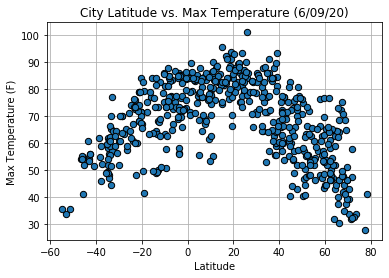

In [31]:
fig, ax = plt.subplots()
clean_weather_df.plot(kind='scatter', x='Lat', y='Max Temp', ax=ax, grid=True, facecolors="blue", edgecolors="black", s=40)
plt.title("City Latitude vs. Max Temperature (6/09/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
ax.set_axisbelow(True)
plt.savefig("Images/latvstemp.png")

## Latitude vs. Humidity Plot

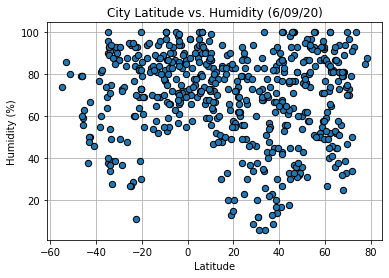

In [32]:
fig, ax = plt.subplots()
clean_weather_df.plot(kind='scatter', x='Lat', y='Humidity', ax=ax, grid=True, facecolors="blue", edgecolors="black", s=40)
plt.title("City Latitude vs. Humidity (6/09/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
ax.set_axisbelow(True)
plt.savefig("Images/latvshumidity.png")

## Latitude vs. Cloudiness Plot

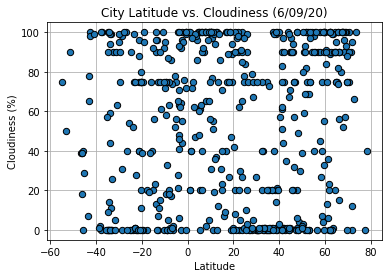

In [33]:
fig, ax = plt.subplots()
clean_weather_df.plot(kind='scatter', x='Lat', y='Cloudiness', ax=ax, grid=True, facecolors="blue", edgecolors="black", s=40)
plt.title("City Latitude vs. Cloudiness (6/09/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
ax.set_axisbelow(True)
plt.savefig("Images/latvscloudiness.png")

## Latitude vs. Wind Speed Plot

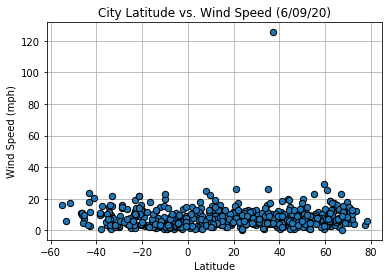

In [34]:
fig, ax = plt.subplots()
clean_weather_df.plot(kind='scatter', x='Lat', y='Wind Speed', ax=ax, grid=True, facecolors="blue", edgecolors="black", s=40)
plt.title("City Latitude vs. Wind Speed (6/09/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
ax.set_axisbelow(True)
plt.savefig("Images/latvswindspeed.png")

## Linear Regression

In [18]:
# OPTIONAL: Create a function to create Linear Regression plots
# x_axis = 
# y_axis = 

# plt.xlabel('')
# plt.ylabel('')
# correlation = st.pearsonr(x_axis, y_axis)
# print(f"The correlation between {plt.xlabel} and {plt.ylabel} is {round(correlation[0],2)}")
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
# regress_values = x_axis * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.plot(x_axis,regress_values,"r-")
# plt.scatter(x_axis, y_axis)
# plt.show()

In [19]:
# Create Northern and Southern Hemisphere DataFrames
pd.to_numeric(clean_weather_df['Lat'])

0      57.05
1     -53.15
2      34.64
3      57.69
4     -46.60
       ...  
544    -4.13
545    59.60
546    27.97
547    45.62
548    -8.76
Name: Lat, Length: 549, dtype: float64

In [20]:
north_hemi_df = clean_weather_df.loc[clean_weather_df['Lat'] > 0]
south_hemi_df = clean_weather_df.loc[clean_weather_df['Lat'] < 0]

In [21]:
pd.to_numeric(north_hemi_df['Lat'])
pd.to_numeric(north_hemi_df['Max Temp'])
pd.to_numeric(north_hemi_df['Humidity'])
pd.to_numeric(north_hemi_df['Cloudiness'])
pd.to_numeric(north_hemi_df['Wind Speed'])

pd.to_numeric(south_hemi_df['Lat'])
pd.to_numeric(south_hemi_df['Max Temp'])
pd.to_numeric(south_hemi_df['Humidity'])
pd.to_numeric(south_hemi_df['Cloudiness'])
pd.to_numeric(south_hemi_df['Wind Speed'])

1       5.82
4      11.01
5      19.17
10      9.66
11     12.75
       ...  
540    10.29
541    10.29
543     2.28
544     4.47
548     3.58
Name: Wind Speed, Length: 181, dtype: float64

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between Latitude and Max Temp (F) is -0.73
The r-squared is: 0.5256363855154352


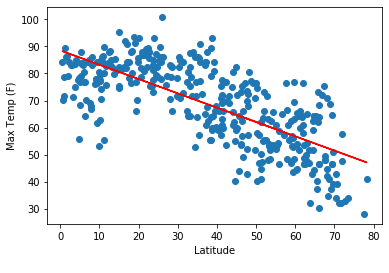

In [22]:
x_axis = abs(north_hemi_df['Lat'])
y_axis = abs(north_hemi_df['Max Temp'])

correlation = st.pearsonr(x_axis, y_axis)
print(f"The correlation between Latitude and Max Temp (F) is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between Latitude and Max Temp (F) is -0.68
The r-squared is: 0.46248808669675434


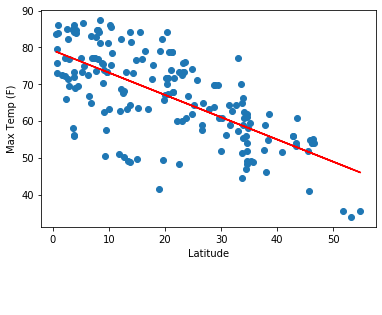

In [23]:
x_axis = abs(south_hemi_df['Lat'])
y_axis = abs(south_hemi_df['Max Temp'])

correlation = st.pearsonr(x_axis, y_axis)
print(f"The correlation between Latitude and Max Temp (F) is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Latitude and Humidity (%) is -0.04
The r-squared is: 0.0016764952117192607


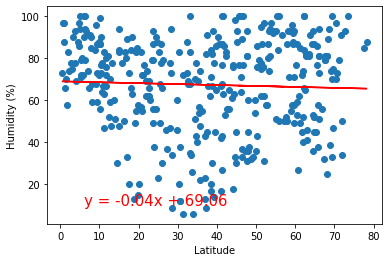

In [24]:
x_axis = north_hemi_df['Lat']
y_axis = north_hemi_df['Humidity']

correlation = st.pearsonr(x_axis, y_axis)
print(f"The correlation between Latitude and Humidity (%) is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Latitude and Humidity (%) is 0.25
The r-squared is: 0.060744586013702376


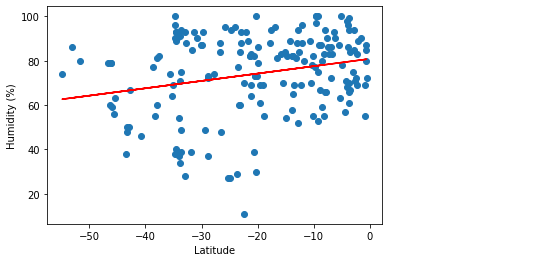

In [25]:
x_axis = south_hemi_df['Lat']
y_axis = south_hemi_df['Humidity']

correlation = st.pearsonr(x_axis, y_axis)
print(f"The correlation between Latitude and Humidity (%) is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Latitude and Cloudiness (%) is 0.02
The r-squared is: 0.0006012074688963083


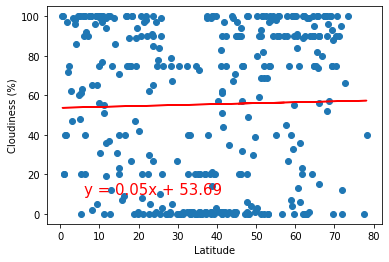

In [26]:
x_axis = north_hemi_df['Lat']
y_axis = north_hemi_df['Cloudiness']

correlation = st.pearsonr(x_axis, y_axis)
print(f"The correlation between Latitude and Cloudiness (%) is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Latitude and Cloudiness (%) is 0.08
The r-squared is: 0.0066083655045945525


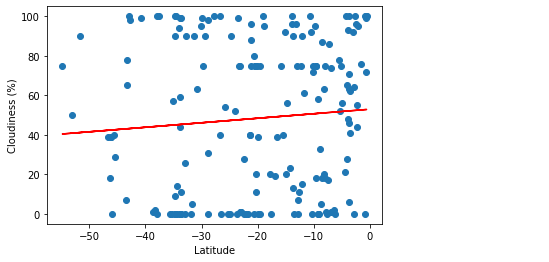

In [27]:
x_axis = south_hemi_df['Lat']
y_axis = south_hemi_df['Cloudiness']

correlation = st.pearsonr(x_axis, y_axis)
print(f"The correlation between Latitude and Cloudiness (%) is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Latitude and Wind Speed (mph) is 0.04
The r-squared is: 0.0017829822355496748


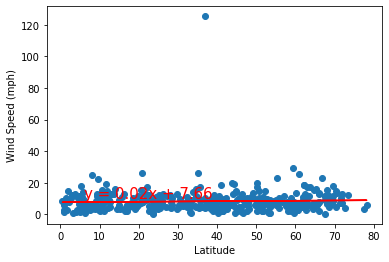

In [28]:
x_axis = north_hemi_df['Lat']
y_axis = north_hemi_df['Wind Speed']

correlation = st.pearsonr(x_axis, y_axis)
print(f"The correlation between Latitude and Wind Speed (mph) is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Latitude and Wind Speed (mph) is -0.28
The r-squared is: 0.0785940314934634


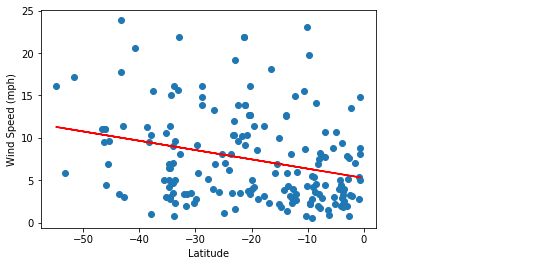

In [29]:
x_axis = south_hemi_df['Lat']
y_axis = south_hemi_df['Wind Speed']

correlation = st.pearsonr(x_axis, y_axis)
print(f"The correlation between Latitude and Wind Speed (mph) is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

##  Analysis

In [50]:
wind_sort = clean_weather_df.sort_values(by=['Lat'])
wind_sort
   
out_wind_sort = wind_sort.drop(480)
out_wind_sort

City    Lat     Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
16        ushuaia -54.80  -68.30     35.60        74          75       16.11   
1    punta arenas -53.15  -70.92     33.80        86          50        5.82   
297  rio gallegos -51.62  -69.22     35.60        80          90       17.22   
4           bluff -46.60  168.33     54.00        79          39       11.01   
279    kaitangata -46.28  169.85     55.17        60          18        9.53   
..            ...    ...     ...       ...       ...         ...         ...   
384      khatanga  71.97  102.50     57.69        34          12       12.68   
121     upernavik  72.79  -56.15     32.67        93          66        4.32   
35         dikson  73.51   80.55     33.78       100         100       12.28   
66        qaanaaq  77.48  -69.36     27.86        85           0        3.40   
80   longyearbyen  78.22   15.64     41.00        88          40        5.82   

    Country        Date  
16       AR  1591757115  
1        CL  1591757113  
297      AR  1591757152  
4        NZ  1591757113  
279      NZ  1591757150  
..      ...         ...  
384      RU  1591757163  
121      GL  1591757129  
35       RU  1591757118  
66       GL  1591757122  
80       SJ  1591757123  

[548 rows x 9 columns]

The correlation between Latitude and Wind Speed (mph) is 0.02
The r-squared is: 0.0005493057978793271


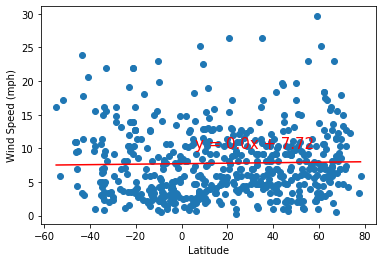

In [54]:
x_axis = out_wind_sort['Lat']
y_axis = out_wind_sort['Wind Speed']

correlation = st.pearsonr(x_axis, y_axis)
print(f"The correlation between Latitude and Wind Speed (mph) is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

1. Appears that the strongest, and only real correlation of weather evaluated is between Latitude and Max Temperature

2. After running this for different times of the day while working on this, you get varying levels of correlation, whether that is a true correlation or not is hard to say based on it shifting so much based on time of day and between the days themselves. 

3. To get any truer sense of correlation, I would imagine you would need to pull data from multiple times throughout a day, as well as to collect it over the course of a year at least. 